In [1]:
import os
import glob
import pandas as pd
import numpy as np
import pyarrow as pa
from tqdm import tqdm
from dbfread import DBF
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as stats
from scipy.stats import ks_2samp
from matplotlib.dates import MonthLocator, DateFormatter
import warnings
import multiprocessing
import cartopy.crs as ccrs

## Sine seasonal, non-sine seasonal, and non-seasonal

In [2]:
# Information about freeflowing rivers
file_path = "/N/lustre/project/proj-212/abhinav/River_Width_analysis/RiverWidthAnalysis/ClimateRegionDivision/AllFiles/FFR_river_network/FFR_river_network.csv"
df_FFR_river = pd.read_csv(file_path)

file_path = "/N/lustre/project/proj-212/Aaditya/Sediment_digitized_file_join/Data/link_grades_riveratlas.csv"
df_COMID_HydroID = pd.read_csv(file_path)

In [3]:
output_path = '/N/lustre/project/proj-212/abhinav/River_Width_analysis/RiverWidthAnalysis/NCDF_out/sine_peak_newresult_below_10m_removed.csv'
result_affected_unaffected_sine_df = pd.read_csv(output_path)

In [4]:
result_affected_unaffected_sine_df

,COMID,amplitude,intercept,phase,CV_flat,slope,intercept_c,R2,p_value,SE_flat,...,ks_stat,rae,rrse,nrmse,stddev,IQR,Med_width,CV_month,IQR_month,Count_month
0,11000054,13.079410,199.339230,-138.581983,19.045221,-0.001529,212.381311,0.000514,7.006700e-01,2.248390,...,0.365517,0.961920,0.971362,0.165752,38.288710,49.539230,200.246671,6.202537,18.685719,12
1,11000302,14.091163,56.653241,58.263806,21.635485,-0.006188,104.042526,0.049472,1.590965e-03,0.865874,...,0.190955,0.514559,0.575773,0.134539,12.214651,18.513768,53.056091,18.689649,19.339549,12
2,11000308,17.331954,71.338300,77.117886,48.078776,0.015124,-38.367907,0.024993,4.255229e-02,2.808653,...,0.387879,0.935081,0.940970,0.257774,36.077804,52.665950,77.704354,18.384505,25.519180,12
3,11000309,9.079683,70.671537,57.498420,12.578556,-0.002258,87.201222,0.012333,7.846961e-02,0.553869,...,0.138889,0.636259,0.691180,0.140585,8.792402,10.246372,67.293075,8.514597,13.069966,12
4,11000766,14.246955,133.836118,169.533723,19.570799,-0.002320,151.695784,0.001356,4.141527e-01,1.179190,...,0.323887,0.910599,0.922506,0.164710,26.208802,34.233909,135.638430,7.156917,13.712097,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342362,86007224,46.923034,91.851194,52.042805,34.690288,0.025606,-144.308918,0.315448,3.472041e-07,2.154387,...,0.422535,0.867109,0.896320,0.211284,18.153184,22.191692,47.964615,14.361019,6.302241,4
342363,86007240,215.873806,268.585271,69.530290,45.942022,-0.022767,247.229184,0.072471,1.508908e-02,3.748441,...,0.407407,0.802924,0.796170,0.179560,33.735971,48.338035,71.788038,28.758186,48.865532,4
342364,86007242,232.381654,269.980814,76.138137,61.651640,-0.004131,94.740638,0.001864,7.410983e-01,4.966998,...,0.311475,0.804573,0.857224,0.205547,38.793491,58.909261,50.422109,15.757046,8.789210,4
342365,86007254,116.351344,170.897907,428.265661,41.840038,0.017273,-66.623282,0.060941,1.587796e-02,2.815334,...,0.442105,0.864734,0.901338,0.189071,27.440485,40.984990,59.353009,7.671205,7.991516,4


In [5]:
output_path = '/N/lustre/project/proj-212/abhinav/River_Width_analysis/RiverWidthAnalysis/NCDF_out/IQR_newresult_below_10m_removed.csv'
result_affected_unaffected_IQR_df = pd.read_csv(output_path)

In [6]:
result_affected_unaffected_IQR_df

,COMID,IQR,Median_Width,Count,Days,IQRc
0,11000054,49.539230,200.246671,674,306,0.247391
1,11000302,18.513768,53.056091,1528,199,0.348947
2,11000308,52.665950,77.704354,685,187,0.677773
3,11000309,10.246372,67.293075,2745,252,0.152265
4,11000766,34.233909,135.638430,2568,498,0.252391
...,...,...,...,...,...,...
476227,86007242,58.909261,50.422109,400,67,1.168322
476228,86007254,40.984990,59.353009,3686,105,0.690529
476229,86007258,30.058821,49.243462,6585,147,0.610412
476230,86007267,51.900625,49.218482,1482,43,1.054495


In [7]:
output_path = '/N/lustre/project/proj-212/abhinav/River_Width_analysis/RiverWidthAnalysis/NCDF_out/Kruskal_newresult_below_10m_removed.csv'
result_affected_unaffected_kruskal_df = pd.read_csv(output_path)

In [8]:
result_affected_unaffected_kruskal_df

,COMID,seasonality
0,11000054,seasonal
1,11000302,seasonal
2,11000308,seasonal
3,11000309,seasonal
4,11000766,seasonal
...,...,...
476227,86007242,non seasonal
476228,86007254,seasonal
476229,86007258,seasonal
476230,86007267,seasonal


In [9]:
output_path = '/N/lustre/project/proj-212/abhinav/River_Width_analysis/RiverWidthAnalysis/NCDF_out/direct_peak newresult_below_10m_removed.csv'
result_affected_unaffected_df = pd.read_csv(output_path)

In [10]:
result_affected_unaffected_df

,COMID,Direct Peak Month
0,11000054,4.0
1,11000302,1.0
2,11000308,7.0
3,11000309,2.0
4,11000766,6.0
...,...,...
476227,86007242,5.0
476228,86007254,5.0
476229,86007258,4.0
476230,86007267,6.0


In [11]:
df_FFR_river['REACH_ID'] = df_FFR_river['REACH_ID'].astype(int)
result_affected_unaffected_sine_df['COMID'] = result_affected_unaffected_sine_df['COMID'].astype(int)

result_affected_unaffected_sine_df_wHydroID = pd.merge(result_affected_unaffected_sine_df, df_COMID_HydroID, left_on='COMID', right_on='COMID', how='inner')
result_df_FFR_river = pd.merge(result_affected_unaffected_sine_df_wHydroID, df_FFR_river, left_on='REACH_ID', right_on='REACH_ID', how='inner')
result_df_FFR_river['freeflow_check'] = (result_df_FFR_river['CSI'] > 95).astype(int)
result_df_FFR_river['fit_check'] = (result_df_FFR_river['nrmse'] <= 0.175).astype(int)

In [12]:
result_df_FFR_river

,COMID,amplitude,intercept,phase,CV_flat,slope,intercept_c,R2,p_value,SE_flat,...,REACH_ID,RIV_ORD,CSI,CSI_D,CSI_FF,CSI_FF1,CSI_FF2,CSI_FFID,freeflow_check,fit_check
0,11000054,13.079410,199.339230,-138.581983,19.045221,-0.001529,212.381311,0.000514,7.006700e-01,2.248390,...,10080580.0,10,99.94545,RDD,1,1,1,113217,1,1
1,11000302,14.091163,56.653241,58.263806,21.635485,-0.006188,104.042526,0.049472,1.590965e-03,0.865874,...,10110972.0,10,100.00000,NAN,1,1,1,136369,1,1
2,11000308,17.331954,71.338300,77.117886,48.078776,0.015124,-38.367907,0.024993,4.255229e-02,2.808653,...,10110400.0,10,99.97790,RDD,1,1,1,136369,1,0
3,11000309,9.079683,70.671537,57.498420,12.578556,-0.002258,87.201222,0.012333,7.846961e-02,0.553869,...,10110972.0,10,100.00000,NAN,1,1,1,136369,1,1
4,11000766,14.246955,133.836118,169.533723,19.570799,-0.002320,151.695784,0.001356,4.141527e-01,1.179190,...,10171582.0,10,99.86405,RDD,1,1,1,165696,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342899,86007224,46.923034,91.851194,52.042805,34.690288,0.025606,-144.308918,0.315448,3.472041e-07,2.154387,...,80013519.0,7,100.00000,NAN,1,1,1,4157220,1,0
342900,86007240,215.873806,268.585271,69.530290,45.942022,-0.022767,247.229184,0.072471,1.508908e-02,3.748441,...,80013666.0,7,100.00000,NAN,1,1,1,4157235,1,0
342901,86007242,232.381654,269.980814,76.138137,61.651640,-0.004131,94.740638,0.001864,7.410983e-01,4.966998,...,80013519.0,7,100.00000,NAN,1,1,1,4157220,1,0
342902,86007254,116.351344,170.897907,428.265661,41.840038,0.017273,-66.623282,0.060941,1.587796e-02,2.815334,...,80013500.0,7,100.00000,NAN,1,1,1,4157250,1,0


In [13]:
result_df_FFR_river = result_df_FFR_river.drop_duplicates(subset='COMID', keep='first')

In [14]:
result_df_FFR_river

,COMID,amplitude,intercept,phase,CV_flat,slope,intercept_c,R2,p_value,SE_flat,...,REACH_ID,RIV_ORD,CSI,CSI_D,CSI_FF,CSI_FF1,CSI_FF2,CSI_FFID,freeflow_check,fit_check
0,11000054,13.079410,199.339230,-138.581983,19.045221,-0.001529,212.381311,0.000514,7.006700e-01,2.248390,...,10080580.0,10,99.94545,RDD,1,1,1,113217,1,1
1,11000302,14.091163,56.653241,58.263806,21.635485,-0.006188,104.042526,0.049472,1.590965e-03,0.865874,...,10110972.0,10,100.00000,NAN,1,1,1,136369,1,1
2,11000308,17.331954,71.338300,77.117886,48.078776,0.015124,-38.367907,0.024993,4.255229e-02,2.808653,...,10110400.0,10,99.97790,RDD,1,1,1,136369,1,0
3,11000309,9.079683,70.671537,57.498420,12.578556,-0.002258,87.201222,0.012333,7.846961e-02,0.553869,...,10110972.0,10,100.00000,NAN,1,1,1,136369,1,1
4,11000766,14.246955,133.836118,169.533723,19.570799,-0.002320,151.695784,0.001356,4.141527e-01,1.179190,...,10171582.0,10,99.86405,RDD,1,1,1,165696,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342899,86007224,46.923034,91.851194,52.042805,34.690288,0.025606,-144.308918,0.315448,3.472041e-07,2.154387,...,80013519.0,7,100.00000,NAN,1,1,1,4157220,1,0
342900,86007240,215.873806,268.585271,69.530290,45.942022,-0.022767,247.229184,0.072471,1.508908e-02,3.748441,...,80013666.0,7,100.00000,NAN,1,1,1,4157235,1,0
342901,86007242,232.381654,269.980814,76.138137,61.651640,-0.004131,94.740638,0.001864,7.410983e-01,4.966998,...,80013519.0,7,100.00000,NAN,1,1,1,4157220,1,0
342902,86007254,116.351344,170.897907,428.265661,41.840038,0.017273,-66.623282,0.060941,1.587796e-02,2.815334,...,80013500.0,7,100.00000,NAN,1,1,1,4157250,1,0


In [15]:
result_df_FFR_river['phase_adj'] = result_df_FFR_river['phase'] % 365.25
result_df_FFR_river['phase_fadj'] = ((365.25 - result_df_FFR_river['phase_adj']) + 365.25/4) % 365.25

def day_to_month_number_and_name(day):
    days_in_month = [31, 28.25, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    if day < 0 or day > 365.25:
        return None, None  # Invalid input
    for i in range(12):
        if day <= days_in_month[i]:
            return i + 1, month_names[i]  # Month number and name
        day -= days_in_month[i]

# Apply the function to calculate the two new columns
result_df_FFR_river[['int_month', 'str_month']] = result_df_FFR_river['phase_fadj'].apply(
    lambda day: pd.Series(day_to_month_number_and_name(day))
)

/tmp/ipykernel_3732706/4225230517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df_FFR_river['phase_adj'] = result_df_FFR_river['phase'] % 365.25
/tmp/ipykernel_3732706/4225230517.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df_FFR_river['phase_fadj'] = ((365.25 - result_df_FFR_river['phase_adj']) + 365.25/4) % 365.25
/tmp/ipykernel_3732706/4225230517.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [16]:
merged_seasonality_df = result_df_FFR_river[['COMID', 'nrmse', 'fit_check', 'freeflow_check', 'int_month']].merge(
    result_affected_unaffected_IQR_df[['COMID', 'Count', 'Days', 'IQRc']], 
    on='COMID', 
    how='inner'
).merge(
    result_affected_unaffected_kruskal_df[['COMID', 'seasonality']], 
    on='COMID', 
    how='inner'
).merge(
    result_affected_unaffected_df[['COMID', 'Direct Peak Month']], 
    on='COMID', 
    how='inner'
)

In [17]:
merged_seasonality_df

,COMID,nrmse,fit_check,freeflow_check,int_month,Count,Days,IQRc,seasonality,Direct Peak Month
0,11000054,0.165752,1,1,8,674,306,0.247391,seasonal,4.0
1,11000302,0.134539,1,1,2,1528,199,0.348947,seasonal,1.0
2,11000308,0.257774,0,1,1,685,187,0.677773,seasonal,7.0
3,11000309,0.140585,1,1,2,2745,252,0.152265,seasonal,2.0
4,11000766,0.164710,1,1,10,2568,498,0.252391,seasonal,6.0
...,...,...,...,...,...,...,...,...,...,...
342362,86007224,0.211284,0,1,2,2611,76,0.462668,seasonal,5.0
342363,86007240,0.179560,0,1,1,1925,87,0.673344,seasonal,6.0
342364,86007242,0.205547,0,1,1,400,67,1.168322,non seasonal,5.0
342365,86007254,0.189071,0,1,1,3686,105,0.690529,seasonal,5.0


In [18]:
def classify_seasonality(row):
    if row['seasonality'] == "non seasonal":
        return "Non Seasonal"
    elif row['seasonality'] == "seasonal" and row['fit_check'] == 1:
        return "Sine Seasonal"
    elif row['seasonality'] == "seasonal" and row['fit_check'] == 0:
        return "Non-Sine Seasonal"
    return None  # Default case (if no condition is met)

# Seasonality classification
merged_seasonality_df['Seasonality'] = merged_seasonality_df.apply(classify_seasonality, axis=1)

In [19]:
merged_seasonality_df['Seasonality'].value_counts()

Seasonality
Sine Seasonal        148314
Non-Sine Seasonal    108324
Non Seasonal          85627
Name: count, dtype: int64

In [20]:
merged_seasonality_df

,COMID,nrmse,fit_check,freeflow_check,int_month,Count,Days,IQRc,seasonality,Direct Peak Month,Seasonality
0,11000054,0.165752,1,1,8,674,306,0.247391,seasonal,4.0,Sine Seasonal
1,11000302,0.134539,1,1,2,1528,199,0.348947,seasonal,1.0,Sine Seasonal
2,11000308,0.257774,0,1,1,685,187,0.677773,seasonal,7.0,Non-Sine Seasonal
3,11000309,0.140585,1,1,2,2745,252,0.152265,seasonal,2.0,Sine Seasonal
4,11000766,0.164710,1,1,10,2568,498,0.252391,seasonal,6.0,Sine Seasonal
...,...,...,...,...,...,...,...,...,...,...,...
342362,86007224,0.211284,0,1,2,2611,76,0.462668,seasonal,5.0,Non-Sine Seasonal
342363,86007240,0.179560,0,1,1,1925,87,0.673344,seasonal,6.0,Non-Sine Seasonal
342364,86007242,0.205547,0,1,1,400,67,1.168322,non seasonal,5.0,Non Seasonal
342365,86007254,0.189071,0,1,1,3686,105,0.690529,seasonal,5.0,Non-Sine Seasonal


## Plot seasonality

In [21]:
import geopandas as gpd
world_subcatchments = gpd.read_file("/N/lustre/project/proj-212/abhinav/River_Width_analysis/RiverWidthAnalysis/ClimateRegionDivision/HUC_Parquet/WorldSubcatchments/hybas_world_lev05_v1c.shp")
world_subcatchments = world_subcatchments.drop(columns=['path'])

In [22]:
import geopandas as gpd
import os

base_dir = "/N/lustre/project/proj-212/Dongmei/MERIT_Hydro/"
shapefiles = [f"riv_pfaf_{i}_MERIT_Hydro_v07_Basins_v01.shp" for i in range(1, 9)]
merged_line_gdf = gpd.GeoDataFrame(pd.concat([gpd.read_file(os.path.join(base_dir, shp)) for shp in shapefiles], ignore_index=True))

In [23]:
merged_line_gdf['COMID'] = merged_line_gdf['COMID'].astype(int)
combined_raw_seasonality_gdf = merged_line_gdf.merge(merged_seasonality_df, on='COMID', how='inner')

In [24]:
combined_raw_seasonality_gdf

,COMID,lengthkm,lengthdir,sinuosity,slope,uparea,order,strmDrop_t,slope_taud,NextDownID,...,nrmse,fit_check,freeflow_check,int_month,Count,Days,IQRc,seasonality,Direct Peak Month,Seasonality
0,11000054,3.383683,1.772915,1.908542,0.003254,31.270284,1,11.0,0.003254,0,...,0.165752,1,1,8,674,306,0.247391,seasonal,4.0,Sine Seasonal
1,11000302,1.235115,0.869181,1.421011,0.004048,1143.994258,3,0.0,0.000000,0,...,0.134539,1,1,2,1528,199,0.348947,seasonal,1.0,Sine Seasonal
2,11000308,15.634562,9.343989,1.673221,0.001440,357.038789,2,22.5,0.001440,11000302,...,0.257774,0,1,1,685,187,0.677773,seasonal,7.0,Non-Sine Seasonal
3,11000309,6.187638,4.281981,1.445041,0.000000,786.298310,3,0.0,0.000000,11000302,...,0.140585,1,1,2,2745,252,0.152265,seasonal,2.0,Sine Seasonal
4,11000766,1.250539,1.003357,1.246355,0.003999,30.028701,1,5.0,0.003999,0,...,0.164710,1,1,10,2568,498,0.252391,seasonal,6.0,Sine Seasonal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342362,86007224,17.143100,10.358802,1.654931,0.025902,78.154412,1,445.8,0.025902,86007131,...,0.211284,0,1,2,2611,76,0.462668,seasonal,5.0,Non-Sine Seasonal
342363,86007240,14.626812,10.275318,1.423490,0.018572,81.473638,1,272.7,0.018572,86007143,...,0.179560,0,1,1,1925,87,0.673344,seasonal,6.0,Non-Sine Seasonal
342364,86007242,1.639394,1.061504,1.544407,0.057292,27.623590,1,94.3,0.057292,86007152,...,0.205547,0,1,1,400,67,1.168322,non seasonal,5.0,Non Seasonal
342365,86007254,5.402939,2.230859,2.421910,0.033075,37.505132,1,179.4,0.033075,86007155,...,0.189071,0,1,1,3686,105,0.690529,seasonal,5.0,Non-Sine Seasonal


In [25]:
import geopandas as gpd
import pandas as pd
from scipy import stats

# Perform a spatial join to associate points with polygons
joined_gdf = gpd.sjoin(combined_raw_seasonality_gdf, world_subcatchments, how="inner", predicate="intersects")

# Group by the polygon index and calculate the mode of the sin_season column
mode_data = joined_gdf.groupby('index_right')['Seasonality'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else 'No Data')

# Count the number of points falling within each polygon
point_counts = joined_gdf.groupby('index_right').size()

# Add the mode and point count as new columns to the world_subcatchments GeoDataFrame
world_subcatchments['sin_season_mode'] = world_subcatchments.index.map(mode_data)
world_subcatchments['point_count'] = world_subcatchments.index.map(point_counts)

# Handle cases where no points fall within a polygon (NaN values)
world_subcatchments['sin_season_mode'] = world_subcatchments['sin_season_mode'].fillna('No Data')
world_subcatchments['point_count'] = world_subcatchments['point_count'].fillna(0)

# Calculate Area_by_point with a conditional check for point_count 
world_subcatchments['Area_by_point'] = np.where(
    world_subcatchments['point_count'] == 0,  # Condition: point_count is 0
    0,  # Value if condition is true
    world_subcatchments['SUB_AREA'] / world_subcatchments['point_count']  # Value if condition is false
)

world_subcatchments.loc[world_subcatchments['Area_by_point'] >= 1000, 'sin_season_mode'] = 'No Data'

/tmp/ipykernel_3732706/2736238705.py:6: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  joined_gdf = gpd.sjoin(combined_raw_seasonality_gdf, world_subcatchments, how="inner", predicate="intersects")


In [26]:
world_subcatchments['sin_season_mode'].value_counts()

sin_season_mode
No Data              1628
Sine Seasonal        1499
Non-Sine Seasonal     853
Non Seasonal          659
Name: count, dtype: int64

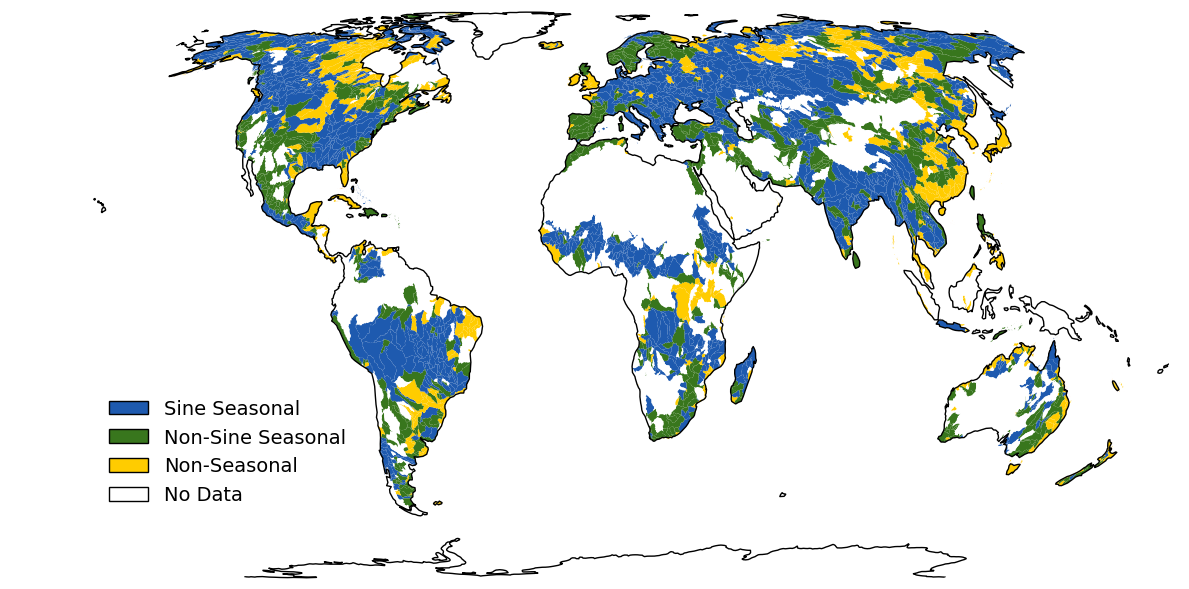

In [27]:
import matplotlib.patches as mpatches

gdf = gpd.read_file('/N/lustre/project/proj-212/abhinav/River_Width_analysis/RiverWidthAnalysis/ClimateRegionDivision/HUC_Parquet/TempShapefiles/random1000pt4robinson.gpkg')

plt.rcParams['font.family'] = 'sans-serif'

# Define a milder color map for the sin_season_mode categories
bold_color_map = {
    'Sine Seasonal': '#1E5AAF',  # Bolder Blue
    'Non-Sine Seasonal': '#38761D',  # Bolder Green
    'Non-Seasonal': '#FFCC00',  # Bolder Yellow
    'No Data': '#FFFFFF'  # Bolder Grey
}

# Assuming 'world_subcatchments' is a GeoDataFrame that includes geometries and 'sin_season_mode'
world_subcatchments['sin_season_mode'] = world_subcatchments['sin_season_mode'].replace({'Non Seasonal': 'Non-Seasonal'})
world_subcatchments['color'] = world_subcatchments['sin_season_mode'].map(bold_color_map)

# Create figure and axis with an "Equal Earth" projection (similar to Peterson)
fig, ax = plt.subplots(figsize=(12, 9), subplot_kw={'projection': ccrs.EqualEarth()})

# Plot the world_subcatchments GeoDataFrame colored by sin_season_mode
world_subcatchments.plot(color=world_subcatchments['color'], ax=ax, linewidth=0.5, edgecolor=None, alpha=1, transform=ccrs.PlateCarree())


# Set title and labels with larger font sizes
# ax.set_title('Subbasins by Seasonality Classes', fontsize=24, pad=20)  # Larger title font, added pad for space

# Increase the font size of tick labels (axes labels)
ax.tick_params(labelsize=14)

# Plot the gdf with larger marker size and transparency
gdf.plot(ax=ax, marker='o', color='black', markersize=10, alpha=1, transform=ccrs.PlateCarree())

# Remove the gridlines and labels but keep the overall boundary
ax.set_global()
ax.coastlines()
# ax.set_extent([-180, 220, -65, 85], crs=ccrs.PlateCarree())
# ax.set_ylim(-65, 85)
ax.set_frame_on(False)

# Create a custom legend with milder colors, larger text, and a black box around each color
legend_patches = [
    mpatches.Patch(facecolor=color, label=label, edgecolor='black', linewidth=1)  # Add black edge to each patch
    for label, color in bold_color_map.items()
]
ax.legend(
    handles=legend_patches, 
    fontsize=14, 
    loc='lower left', 
    bbox_to_anchor=(0.07, 0.10), 
    frameon=False, 
)

# Add space between elements
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust the top margin to add space between title and plot

# Show the plot
plt.savefig('/N/lustre/project/proj-212/abhinav/River_Width_analysis/RiverWidthAnalysis/Final_Figures/Seasonality_below_10m_removed.tiff', dpi=600)
plt.show()

/N/lustre/project/proj-212/abhinav/environment/glows-venv/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/N/lustre/project/proj-212/abhinav/environment/glows-venv/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/tmp/ipykernel_3732706/3481560147.py:58: UserWarning: This figure includes Axes that are not compatible with tight_lay

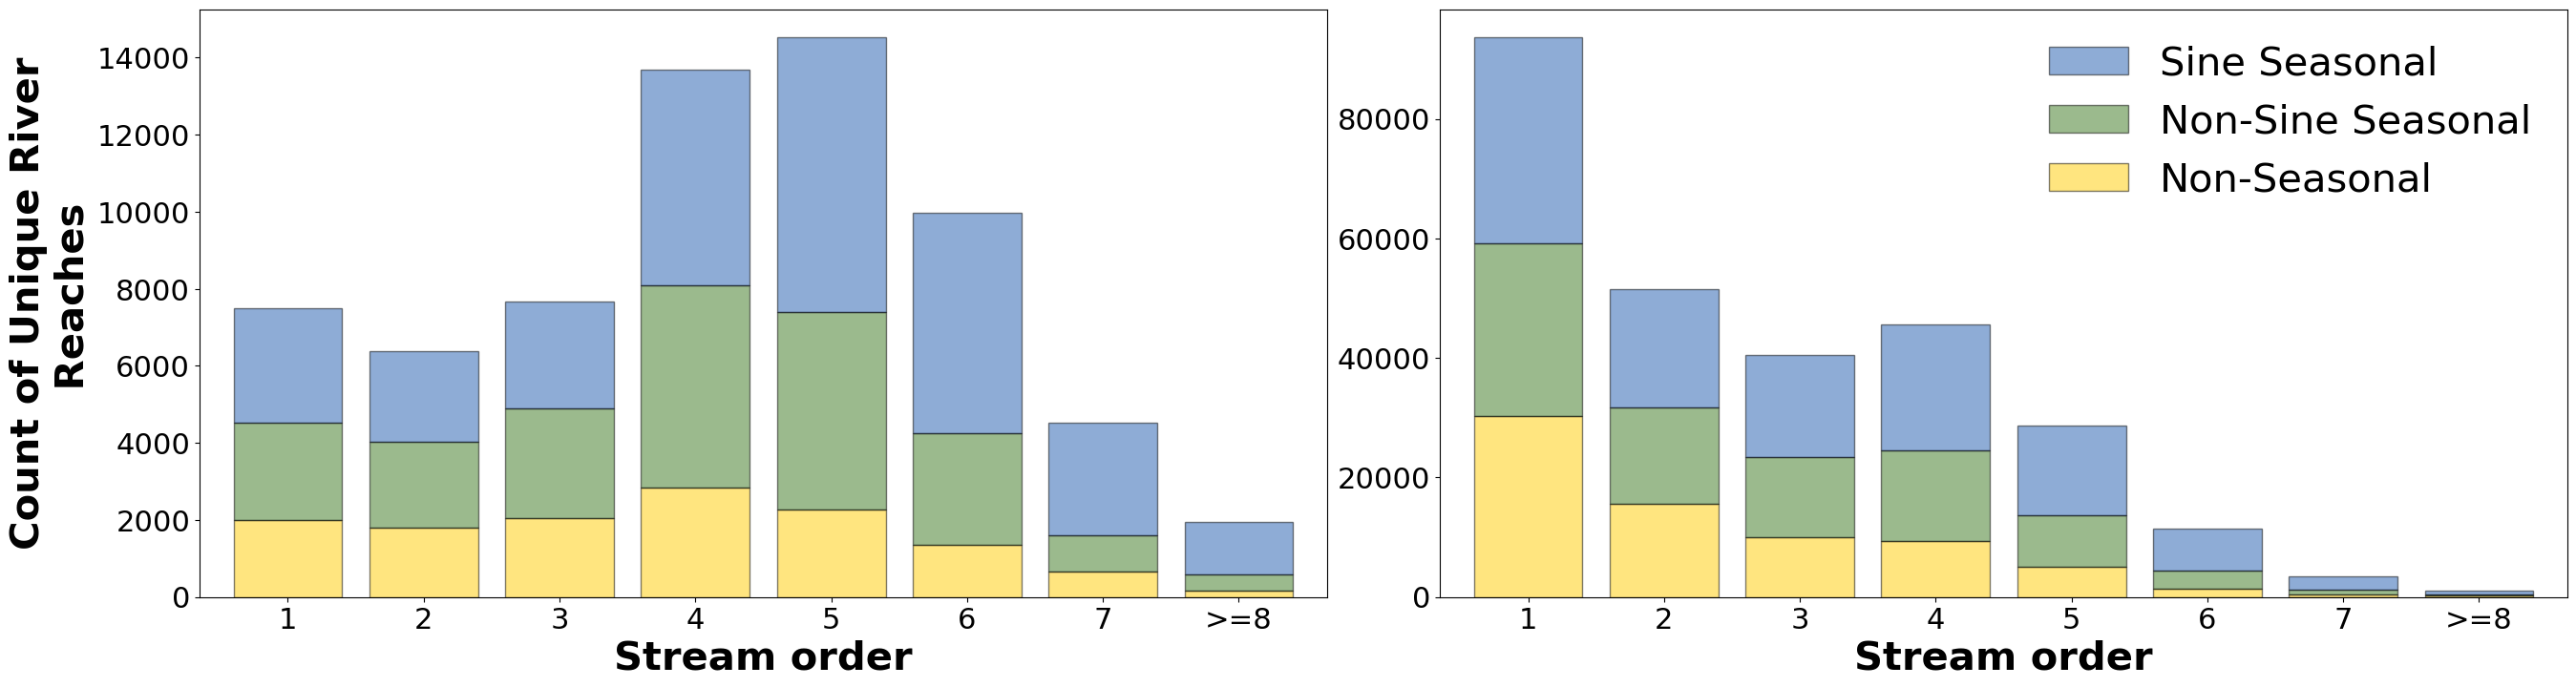

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Filter the dataframe for freeflow = 1 and freeflow = 0
freeflow_1_df = combined_raw_seasonality_gdf[combined_raw_seasonality_gdf['freeflow_check'] == 1]    # Free flowing rivers
freeflow_0_df = combined_raw_seasonality_gdf[combined_raw_seasonality_gdf['freeflow_check'] == 0]    # regulated rivers

# Group orders > 7 into '>=8' for both datasets
freeflow_1_df['order_grouped'] = np.where(freeflow_1_df['order'] > 7, '>=8', freeflow_1_df['order'].astype(str))
freeflow_0_df['order_grouped'] = np.where(freeflow_0_df['order'] > 7, '>=8', freeflow_0_df['order'].astype(str))

# Pivot the data to create stacked format for both datasets
stacked_data_1 = freeflow_1_df.pivot_table(index='order_grouped', columns='Seasonality', aggfunc='size', fill_value=0)
stacked_data_0 = freeflow_0_df.pivot_table(index='order_grouped', columns='Seasonality', aggfunc='size', fill_value=0)

stacked_data_0.rename(columns={'Non Seasonal': 'Non-Seasonal'}, inplace=True)
stacked_data_1.rename(columns={'Non Seasonal': 'Non-Seasonal'}, inplace=True)

# Define your custom color palette
bold_color_map = {
    'Sine Seasonal': '#1E5AAF',      # Bolder Blue
    'Non-Sine Seasonal': '#38761D',  # Bolder Green
    'Non-Seasonal': '#FFCC00',       # Bolder Yellow
    'No Data': '#B3B3B3'             # Bolder Grey
}

# Ensure the colors are assigned to the correct categories in the same order as the stacked plot
colors = [bold_color_map[category] for category in stacked_data_1.columns]

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 22
# Create subplots with shared x-axis but separate y-axes, and minimal spacing between them
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(32, 8), gridspec_kw={'wspace': 0.1})  # Minimal spacing between plots

# Plot for freeflow = 0 (reversed to the left side now)
stacked_data_0.plot(kind='bar', stacked=True, ax=ax1, color=colors, edgecolor='black', alpha=0.5, width=0.8)
ax1.set_xlabel('Stream order', fontweight = 'bold', fontsize=30)
ax1.set_ylabel('Count of Unique River\n Reaches', fontweight = 'bold', fontsize=30)
ax1.tick_params(axis='x')
ax1.tick_params(axis='y')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)  # Set x-axis labels horizontal

# Plot for freeflow = 1 (reversed to the right side now)
stacked_data_1.plot(kind='bar', stacked=True, ax=ax2, color=colors, edgecolor='black', alpha=0.5, width=0.8)
ax2.set_xlabel('Stream order', fontweight = 'bold', fontsize=30)
ax2.set_ylabel('')  # Remove y-axis label for the second plot
ax2.tick_params(axis='x')
ax2.tick_params(axis='y')  # Keep y-ticks and labels
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)  # Set x-axis labels horizontal

# Keep legend only on the right plot (for freeflow = 1)
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(list(reversed(handles)), list(reversed(labels)), loc='upper right', frameon = False, prop={'size': 30, 'family': 'sans-serif'})
ax1.legend().set_visible(False)  # Hide legend on the first plot

# Show the plot with no spacing between bars and subplots
plt.tight_layout()
plt.savefig('/N/lustre/project/proj-212/abhinav/River_Width_analysis/RiverWidthAnalysis/Final_Figures/Seasonality_below_10m_removed_bars.tiff', dpi=600)
plt.show()


In [29]:
filename = '/N/lustre/project/proj-212/abhinav/River_Width_analysis/RiverWidthAnalysis/NCDF_out/seasonality_classification_free_flowing.txt'
stacked_data_1.to_csv(filename, header=True)

filename = '/N/lustre/project/proj-212/abhinav/River_Width_analysis/RiverWidthAnalysis/NCDF_out/seasonality_classification_regulated.txt'
stacked_data_0.to_csv(filename, header=True)

## Plot some sine fits

In [30]:
# Load data
# Load the GLOW-S width with snow affected values removed 
output_path = '/N/lustre/project/proj-212/abhinav/River_Width_analysis/RiverWidthAnalysis/ClimateRegionDivision/HUC_Parquet/allRegion_large_T273check_over60.parquet'
final_large_data_warm_over60 = pd.read_parquet(output_path)

# Remove all the rows with width less than 10m
final_large_data_warm_over60 = final_large_data_warm_over60[final_large_data_warm_over60['width']>10]


In [31]:
def sine_curve_one(x, amplitude, intercept, phase):
    time_period = 365.25
    return np.abs(float(amplitude)) * np.sin((2 * np.pi * x / time_period) + (2 * np.pi * phase / time_period)) + intercept
    
def filteredComidTo60pcMedian(one_comid):
    one_comid_copy = one_comid.copy()
    min_data_taken_from_high_freq_stn = 0.6

    # Make proper date format
    one_comid_copy['date'] = pd.to_datetime(one_comid_copy['date'])
    base_date = pd.to_datetime('2000-01-01')
    one_comid_copy['days2000'] = (one_comid_copy['date'] - base_date).dt.days
    one_comid_copy.drop('date', axis=1, inplace=True)
    
    # Limit the data by taking 70% data from top n frequent COMID
    river_id_counts = one_comid_copy['riverID'].value_counts()
    cumulative_sum = river_id_counts.cumsum()
    total_sum = river_id_counts.sum()
    threshold = min_data_taken_from_high_freq_stn * total_sum
    filtered_data = one_comid_copy[one_comid_copy['riverID'].isin(river_id_counts.index[0:cumulative_sum[cumulative_sum < threshold].count() + 1])]
    
    filtered_data['width_norm'] = filtered_data['width'] * filtered_data['width'].mean() / filtered_data.groupby('riverID')['width'].transform('mean')
    
    # Limit the data to 2% and 98% quantile width_norm
    quantile_bot = filtered_data['width_norm'].quantile(0.02)
    quantile_top = filtered_data['width_norm'].quantile(0.98)
    filtered_data = filtered_data[(filtered_data['width_norm'] > quantile_bot) & (filtered_data['width_norm'] < quantile_top)]
    
    # Median data computation
    median_days2000 = filtered_data.groupby('days2000')['width_norm'].median()
    return median_days2000

/tmp/ipykernel_3732706/1521051789.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['width_norm'] = filtered_data['width'] * filtered_data['width'].mean() / filtered_data.groupby('riverID')['width'].transform('mean')


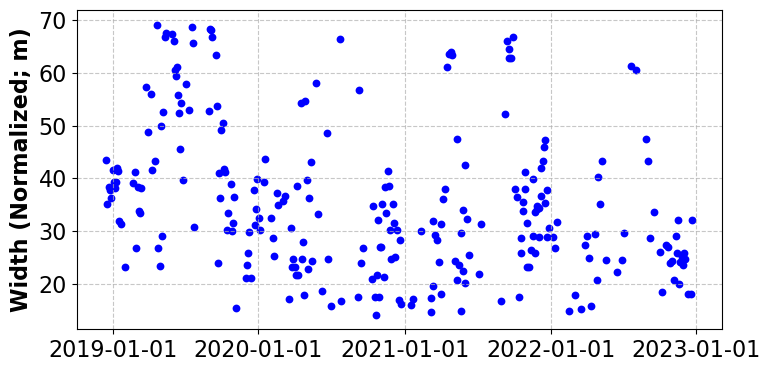

In [32]:
# Plot sine curves fits
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator
import numpy as np
from matplotlib.dates import DateFormatter

river_reach = 11005365
sname = 'sine_fitting_example_{}.tiff'.format(river_reach)

# Data subsample and necessary calculations
data_for_comid = final_large_data_warm_over60[final_large_data_warm_over60['COMID'] == river_reach]
data_region_for_comid = result_affected_unaffected_sine_df[result_affected_unaffected_sine_df['COMID'] == river_reach]
months = MonthLocator(bymonth=[1], interval=1)

data_for_comid_median = filteredComidTo60pcMedian(data_for_comid)

plt.figure(figsize=(8, 4))  # Figure size adjustment
plt.rcParams['font.size'] = 16
plt.scatter(data_for_comid_median.index + 10957, data_for_comid_median.values, 
            label='Width', linewidth=2, color='blue', s=13)

# Sine curve parameters
amplitude = data_region_for_comid['amplitude'].iloc[0]
phase = data_region_for_comid['phase'].iloc[0]
intercept = data_region_for_comid['intercept'].iloc[0]

# Sine curve calculation and plotting
x_min = min(data_for_comid_median.index + 10957)
x_max = max(data_for_comid_median.index + 10957)
x_values = np.linspace(x_min, x_max, num=1000)
y_values = sine_curve_one(x_values, amplitude, intercept, phase)
#plt.plot(x_values, y_values, label='Best Fit Sine Curve', color='red', linewidth=2)

# Axis labels, grid, and legend
# plt.xlabel('Date', fontsize=16)
plt.ylabel('Width (Normalized; m)', fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
#plt.legend(fontsize=14, frameon=False, loc='lower left')

# Date formatting and tick adjustments
ax = plt.gca()
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

# Adjust x and y axis ticks with larger sizes
plt.xticks(rotation=0)
# plt.yticks(np.arange(10, 68, 10), fontsize=14)  # y-axis values in multiples of 10

# Layout and axis limits
plt.tight_layout()
# plt.ylim(15, 55)'

plt.savefig(os.path.join('/N/lustre/project/proj-212/abhinav/River_Width_analysis/RiverWidthAnalysis/Final_Figures', sname), dpi=600)
plt.show()

In [33]:
result_affected_unaffected_sine_df[result_affected_unaffected_sine_df['COMID'] == 12015544]

,COMID,amplitude,intercept,phase,CV_flat,slope,intercept_c,R2,p_value,SE_flat,...,ks_stat,rae,rrse,nrmse,stddev,IQR,Med_width,CV_month,IQR_month,Count_month
4124,12015544,13.014787,77.344142,221.843266,26.66771,0.011915,-9.132555,0.055807,0.000068,1.30949,...,0.390681,0.918558,0.924233,0.203626,21.872794,30.086138,82.21897,11.102387,12.813807,12


## IQR analysis for steady and unsteady classification

In [34]:
def classify_steady_unsteady(row):
    if row['IQRc'] <= 0.05:
        return 'IQRc < 0.05'
    elif (row['IQRc'] > 0.05) & (row['IQRc'] <= 0.10):
        return  '0.05 < IQRc < 0.10'
    elif (row['IQRc'] > 0.10) & (row['IQRc'] <= 0.20):
        return  '0.10 < IQRc < 0.20'
    elif (row['IQRc'] > 0.20) & (row['IQRc'] <= 0.50):
        return  '0.20 < IQRc < 0.50'
    elif (row['IQRc'] > 0.50) & (row['IQRc'] <= 1.00):
        return  '0.50 < IQRc < 1.00'
    elif row['IQRc'] > 1.00:
        return  'IQRc > 1.00'
        
# Seasonality classification
merged_steady_df = merged_seasonality_df.copy()
merged_steady_df['steadiness'] = merged_steady_df.apply(lambda row: classify_steady_unsteady(row), axis=1)

In [35]:
merged_steady_df['steadiness'].value_counts()

steadiness
0.20 < IQRc < 0.50    156867
0.10 < IQRc < 0.20     70717
0.50 < IQRc < 1.00     51095
0.05 < IQRc < 0.10     36372
IQRc < 0.05            22235
IQRc > 1.00             5081
Name: count, dtype: int64

In [36]:
world_subcatchments = gpd.read_file("/N/lustre/project/proj-212/abhinav/River_Width_analysis/RiverWidthAnalysis/ClimateRegionDivision/HUC_Parquet/WorldSubcatchments/hybas_world_lev05_v1c.shp")
world_subcatchments = world_subcatchments.drop(columns=['path'])

base_dir = "/N/lustre/project/proj-212/Dongmei/MERIT_Hydro/"
shapefiles = [f"riv_pfaf_{i}_MERIT_Hydro_v07_Basins_v01.shp" for i in range(1, 9)]
merged_line_gdf = gpd.GeoDataFrame(pd.concat([gpd.read_file(os.path.join(base_dir, shp)) for shp in shapefiles], ignore_index=True))

merged_line_gdf['COMID'] = merged_line_gdf['COMID'].astype(int)
merged_steady_df = merged_line_gdf.merge(merged_steady_df, on='COMID', how='inner')

merged_steady_gdf = merged_line_gdf.merge(merged_steady_df, on='COMID', how='inner')
merged_steady_gdf = merged_steady_gdf.set_geometry('geometry_x')

/N/lustre/project/proj-212/abhinav/environment/glows-venv/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/N/lustre/project/proj-212/abhinav/environment/glows-venv/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/tmp/ipykernel_3732706/128932691.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layo

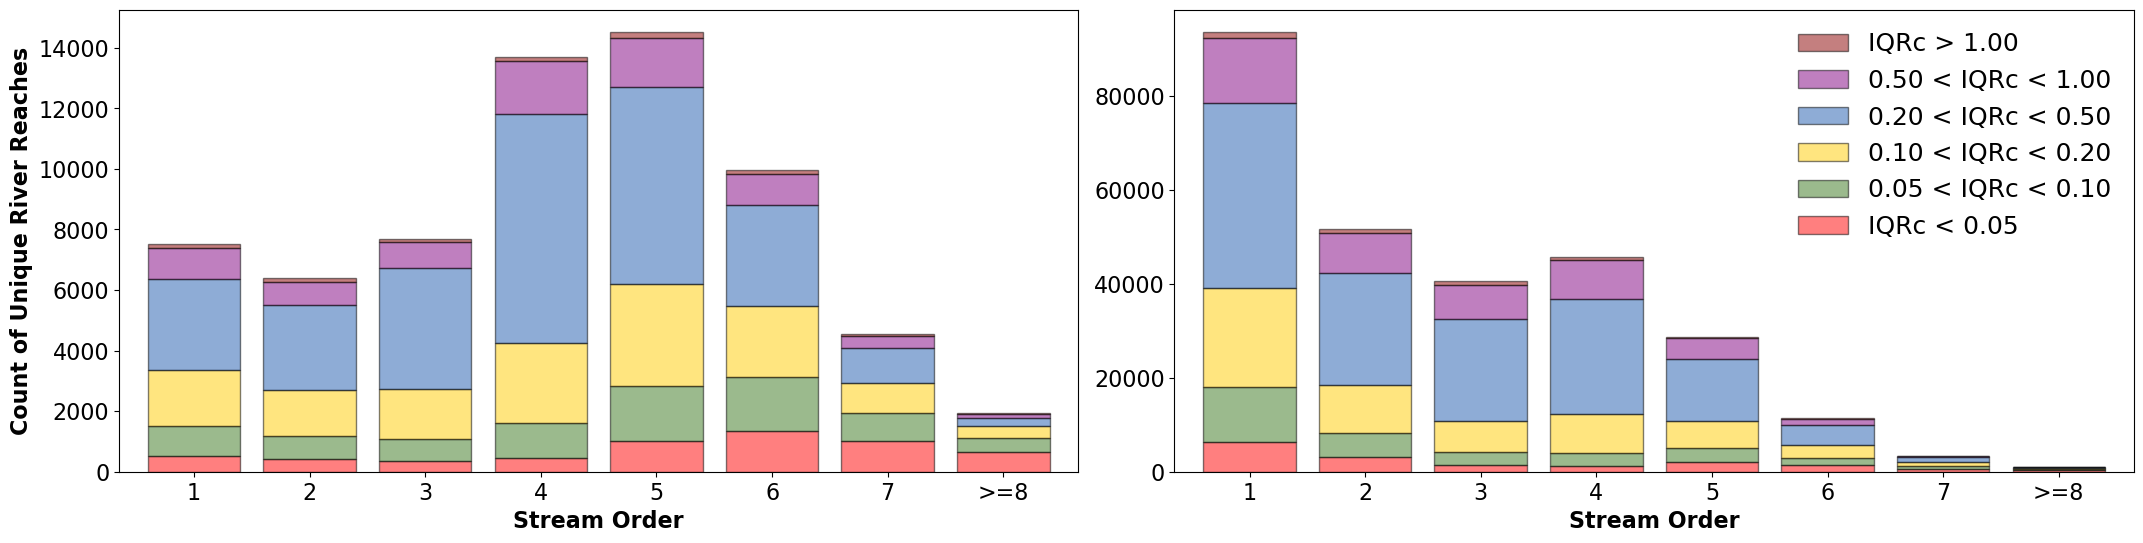

In [37]:
# Filter the dataframe for freeflow = 1 and freeflow = 0
freeflow_1_df = merged_steady_gdf[merged_steady_gdf['freeflow_check'] == 1]    # Free flowing rivers
freeflow_0_df = merged_steady_gdf[merged_steady_gdf['freeflow_check'] == 0]    # regulated rivers

# Group orders > 7 into '>=8' for both datasets
freeflow_1_df['order_grouped'] = np.where(freeflow_1_df['order_x'] > 7, '>=8', freeflow_1_df['order_x'].astype(str))
freeflow_0_df['order_grouped'] = np.where(freeflow_0_df['order_x'] > 7, '>=8', freeflow_0_df['order_x'].astype(str))

# Pivot the data to create stacked format for both datasets
stacked_data_1 = freeflow_1_df.pivot_table(index='order_grouped', columns='steadiness', aggfunc='size', fill_value=0)
stacked_data_0 = freeflow_0_df.pivot_table(index='order_grouped', columns='steadiness', aggfunc='size', fill_value=0)

# Define your custom color palette
bold_color_map = {
    'IQRc < 0.05': 'red',
    '0.05 < IQRc < 0.10': '#38761D',  # Green
    '0.10 < IQRc < 0.20': '#FFCC00',  # Yellow
    '0.20 < IQRc < 0.50': '#1E5AAF',  # Blue
    '0.50 < IQRc < 1.00': '#800080',  # Purple
    'IQRc > 1.00': '#8B0000',         # Dark red
    'No Data': '#FFFFFF'             # White/Grey
}

# Ensure the colors are assigned to the correct categories in the same order as the stacked plot
desired_order = ['IQRc < 0.05', '0.05 < IQRc < 0.10', '0.10 < IQRc < 0.20', '0.20 < IQRc < 0.50', '0.50 < IQRc < 1.00', 'IQRc > 1.00']
stacked_data_1 = stacked_data_1[[col for col in desired_order if col in stacked_data_1.columns]]
stacked_data_0 = stacked_data_0[[col for col in desired_order if col in stacked_data_0.columns]]

colors = [bold_color_map[category] for category in stacked_data_1.columns]

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 16
# Create subplots with shared x-axis but separate y-axes, and minimal spacing between them
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(26, 6), gridspec_kw={'wspace': 0.1})  # Minimal spacing between plots

# Plot for freeflow = 0 (reversed to the left side now)
stacked_data_0.plot(kind='bar', stacked=True, ax=ax1, color=colors, edgecolor='black', alpha=0.5, width=0.8)
ax1.set_xlabel('Stream Order', fontweight = 'bold')
ax1.set_ylabel('Count of Unique River Reaches', fontweight = 'bold')
ax1.tick_params(axis='x')
ax1.tick_params(axis='y')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)  # Set x-axis labels horizontal

# Plot for freeflow = 1 (reversed to the right side now)
stacked_data_1.plot(kind='bar', stacked=True, ax=ax2, color=colors, edgecolor='black', alpha=0.5, width=0.8)
ax2.set_xlabel('Stream Order', fontweight = 'bold')
ax2.set_ylabel('')  # Remove y-axis label for the second plot
ax2.tick_params(axis='x')
ax2.tick_params(axis='y')  # Keep y-ticks and labels
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)  # Set x-axis labels horizontal

# Keep legend only on the right plot (for freeflow = 1)
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(list(reversed(handles)), list(reversed(labels)), loc='upper right', frameon = False, prop={'size': 18, 'family': 'sans-serif'})
ax1.legend().set_visible(False)  # Hide legend on the first plot

# Show the plot with no spacing between bars and subplots
plt.tight_layout()
plt.show()

In [ ]:
# Perform a spatial join to associate points with polygons
joined_gdf = gpd.sjoin(merged_steady_gdf, world_subcatchments, how="inner", predicate="intersects")

# Group by the polygon index and calculate the mode of the sin_season column
mode_data = joined_gdf.groupby('index_right')['steadiness'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else 'No Data')

# Count the number of points falling within each polygon
point_counts = joined_gdf.groupby('index_right').size()

# Add the mode and point count as new columns to the world_subcatchments GeoDataFrame
world_subcatchments['steadiness'] = world_subcatchments.index.map(mode_data)
world_subcatchments['point_count'] = world_subcatchments.index.map(point_counts)

# Handle cases where no points fall within a polygon (NaN values)
world_subcatchments['steadiness'] = world_subcatchments['steadiness'].fillna('No Data')
world_subcatchments['point_count'] = world_subcatchments['point_count'].fillna(0)

# Calculate Area_by_point with a conditional check for point_count 
world_subcatchments['Area_by_point'] = np.where(
    world_subcatchments['point_count'] == 0,  # Condition: point_count is 0
    0,  # Value if condition is true
    world_subcatchments['SUB_AREA'] / world_subcatchments['point_count']  # Value if condition is false
)

world_subcatchments.loc[world_subcatchments['Area_by_point'] >= 1000, 'steadiness'] = 'No Data'

/tmp/ipykernel_3732706/3401150234.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  joined_gdf = gpd.sjoin(merged_steady_gdf, world_subcatchments, how="inner", predicate="intersects")


In [ ]:
gdf = gpd.read_file('/N/lustre/project/proj-212/abhinav/River_Width_analysis/RiverWidthAnalysis/ClimateRegionDivision/HUC_Parquet/TempShapefiles/random1000pt4robinson.gpkg')

plt.rcParams['font.family'] = 'sans-serif'

# Define a milder color map for the sin_season_mode categories
bold_color_map = {
    'IQRc < 0.05': 'red',
    '0.05 < IQRc < 0.10': '#38761D',  # Green
    '0.10 < IQRc < 0.20': '#FFCC00',  # Yellow
    '0.20 < IQRc < 0.50': '#1E5AAF',  # Blue
    '0.50 < IQRc < 1.00': '#800080',  # Purple
    'IQRc > 1.00': '#8B0000',         # Dark red
    'No Data': '#FFFFFF'             # White/Grey
}

# Assuming 'world_subcatchments' is a GeoDataFrame that includes geometries and 'sin_season_mode'
world_subcatchments['color'] = world_subcatchments['steadiness'].map(bold_color_map)

# Create figure and axis with an "Equal Earth" projection (similar to Peterson)
fig, ax = plt.subplots(figsize=(12, 9), subplot_kw={'projection': ccrs.EqualEarth()})

# Plot the world_subcatchments GeoDataFrame colored by sin_season_mode
world_subcatchments.plot(color=world_subcatchments['color'], ax=ax, linewidth=0.5, edgecolor=None, alpha=1, transform=ccrs.PlateCarree())

# Set title and labels with larger font sizes
# ax.set_title('Subbasins by Seasonality Classes', fontsize=24, pad=20)  # Larger title font, added pad for space

# Increase the font size of tick labels (axes labels)
ax.tick_params(labelsize=14)

# Plot the gdf with larger marker size and transparency
gdf.plot(ax=ax, marker='o', color='black', markersize=10, alpha=1, transform=ccrs.PlateCarree())

# Remove the gridlines and labels but keep the overall boundary
ax.set_global()
ax.coastlines()
ax.set_frame_on(False)

# Create a custom legend with milder colors, larger text, and a black box around each color
legend_patches = [
    mpatches.Patch(facecolor=color, label=label, edgecolor='black', linewidth=1)  # Add black edge to each patch
    for label, color in bold_color_map.items()]

ax.legend(
    handles=legend_patches, 
    fontsize=14, 
    loc='lower left', 
    bbox_to_anchor=(0.00, 0.10), 
    frameon=False, 
)

# Add space between elements
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust the top margin to add space between title and plot

# Show the plot
plt.show()

In [ ]:
merged_steady_gdf

## Plot peak results

In [ ]:
# Load data
output_path = '/N/lustre/project/proj-212/abhinav/River_Width_analysis/RiverWidthAnalysis/ClimateRegionDivision/HUC_Parquet/allRegion_large_T273check_over60.parquet'
final_large_data_warm_over60 = pd.read_parquet(output_path)
final_large_data_warm_over60 = final_large_data_warm_over60[final_large_data_warm_over60['width']>10]

In [ ]:
final_large_data_warm_over60['riverID'].unique().shape

In [ ]:
avg_lat_lon = final_large_data_warm_over60.groupby('COMID')[['lat', 'lon']].mean().reset_index()

In [ ]:
avg_lat_lon

In [ ]:
from netCDF4 import Dataset, num2date

# Load the GeoDataFrame
sorted_comids = sorted(combined_raw_seasonality_gdf['COMID'].tolist())

# Filter COMIDs starting with digits from '1' to '8'
comid_groups = {str(i): [comid for comid in sorted_comids if str(comid).startswith(str(i))] for i in range(1, 9)}

# Define file paths for each range
file_paths = {
    '1': "/N/lustre/project/proj-212/Dongmei/globalQ/HRR/GRADES/data/GRFR/discharge/output_pfaf_01_1979-2019.nc",
    '2': "/N/lustre/project/proj-212/Dongmei/globalQ/HRR/GRADES/data/GRFR/discharge/output_pfaf_02_1979-2019.nc",
    '3': "/N/lustre/project/proj-212/Dongmei/globalQ/HRR/GRADES/data/GRFR/discharge/output_pfaf_03_1979-2019.nc",
    '4': "/N/lustre/project/proj-212/Dongmei/globalQ/HRR/GRADES/data/GRFR/discharge/output_pfaf_04_1979-2019.nc",
    '5': "/N/lustre/project/proj-212/Dongmei/globalQ/HRR/GRADES/data/GRFR/discharge/output_pfaf_05_1979-2019.nc",
    '6': "/N/lustre/project/proj-212/Dongmei/globalQ/HRR/GRADES/data/GRFR/discharge/output_pfaf_06_1979-2019.nc",
    '7': "/N/lustre/project/proj-212/Dongmei/globalQ/HRR/GRADES/data/GRFR/discharge/output_pfaf_07_1979-2019.nc",
    '8': "/N/lustre/project/proj-212/Dongmei/globalQ/HRR/GRADES/data/GRFR/discharge/output_pfaf_08_1979-2019.nc"
}

In [ ]:
len(sorted_comids)

In [ ]:
from netCDF4 import Dataset, num2date
from tqdm import tqdm
import numpy as np
import pandas as pd
from datetime import datetime
year1 = '1979'
year2 = '2024'

region_peakmonth_df = []

for region in comid_groups.keys():
    print("\n Region", region, "Processing: \n")
    
    comid_list = comid_groups[region]
    file_path = file_paths[region]

    with Dataset(file_path, mode='r') as nc_file:
        
        # Extract the variable Qout and relevant dimensions
        qout = nc_file.variables['Qout'][:]
        rivids = nc_file.variables['rivid'][:]
        time_var = nc_file.variables['time']
        times = num2date(time_var[:], units=time_var.units, calendar='standard')
        print('Extracted Raw')

        # Create a time mask for the year 2019
        start_date = datetime(1979, 1, 1)
        dates = pd.date_range(start=start_date, periods=len(times))
        mask_2019 = (dates >= year1 + '-01-01') & (dates <= year2 + '-12-31')
        dates_2019 = dates[mask_2019]
        df_dates_2019 = pd.DataFrame({'Date': dates_2019})
        df_dates_2019['Month'] = df_dates_2019['Date'].dt.month
        print('1979-2024 data extracted')

        # Select Qout data for 2019
        qout_2019 = qout[mask_2019, :]  # Shape (365, 647946) for 2019

        # Calculate monthly means
        monthly_means = np.zeros((12, qout_2019.shape[1]))  # Shape (12, 647946)
        print('Extract Monthly means')

        for month in range(1, 13):
            month_mask = df_dates_2019['Month'] == month
            monthly_means[month - 1, :] = qout_2019[month_mask, :].mean(axis=0)

        # Find the month with the maximum average for each column
        month_with_max_average = np.argmax(monthly_means, axis=0) + 1  # 1-indexed (Jan=1, Feb=2, etc.)

        # Map the peak month to each COMID
        df_peak_month = pd.DataFrame({
            'COMID': rivids,
            'NC Peak Month': month_with_max_average
        })

        region_peakmonth_df.append(df_peak_month)


In [ ]:
region_peakmonth_df

In [ ]:
all_peak_month_df = pd.concat(region_peakmonth_df, ignore_index=True)
all_peak_month_df.rename(columns={'NC Peak Month': 'NC_Peak_Month'}, inplace=True)

In [ ]:
all_peak_month_df['COMID'].unique().shape

In [ ]:
combined_raw_seasonality_gdf[combined_raw_seasonality_gdf['Direct Peak Month'] == 'No clear peak'].shape

In [ ]:
# Only retain the seasonal rivers
combined_raw_seasonality_gdf_peaks = combined_raw_seasonality_gdf[combined_raw_seasonality_gdf['seasonality'] == 'seasonal']

# replace sine curve estimates peaks ('int_month') by 'NaN' if fit_check is zero
combined_raw_seasonality_gdf_peaks.loc[combined_raw_seasonality_gdf_peaks['fit_check'] == 0, 'int_month'] = np.nan

In [ ]:
combined_raw_seasonality_gdf_peaks.shape

In [ ]:
gdf_sine_nonsine_nc_peaks = pd.merge(combined_raw_seasonality_gdf_peaks, all_peak_month_df[['COMID', 'NC_Peak_Month']], on='COMID', how='left')

In [ ]:
gdf_sine_nonsine_nc_peaks.shape

In [ ]:
numeric_series = pd.to_numeric(combined_raw_seasonality_gdf_peaks['int_month'], errors='coerce')
numeric_count = numeric_series.notna().sum()
numeric_count

In [ ]:
# Add avergae lat lon corresponding to each COMID
# remove the lat-lon from gdf_sine_nonsine_nc_peaks
gdf_sine_nonsine_nc_peaks.drop(columns=['lat', 'lon'])

# Add lat lon
gdf_sine_nonsine_nc_peaks = pd.merge(gdf_sine_nonsine_nc_peaks, avg_lat_lon, on = 'COMID', how='left')
gdf_sine_nonsine_nc_peaks = gdf_sine_nonsine_nc_peaks.rename(columns={'lat_y': 'lat', 'lon_y': 'lon'})

In [ ]:
gdf_sine_nonsine_nc_peaks[(gdf_sine_nonsine_nc_peaks['lat']>45) & (gdf_sine_nonsine_nc_peaks['Direct Peak Month'] == '6.0')]['int_month']

In [ ]:
# Remove all the non-numeric peak-month rows
"""
gdf_sine_nonsine_nc_peaks = gdf_sine_nonsine_nc_peaks[
    ~gdf_sine_nonsine_nc_peaks['int_month'].isin(["No clear peak", "never 8 month"])
].copy()

gdf_sine_nonsine_nc_peaks = gdf_sine_nonsine_nc_peaks[
    ~gdf_sine_nonsine_nc_peaks['Direct Peak Month'].isin(["No clear peak", "never 8 months"])
].copy()
"""
gdf_sine_nonsine_nc_peaks['Direct Peak Month'] = gdf_sine_nonsine_nc_peaks['Direct Peak Month'].replace(
    ['No clear peak', 'never 8 months'], np.nan)

gdf_sine_nonsine_nc_peaks['int_month'] = gdf_sine_nonsine_nc_peaks['int_month'].astype('float')
gdf_sine_nonsine_nc_peaks['Direct Peak Month'] = gdf_sine_nonsine_nc_peaks['Direct Peak Month'].astype('float')
gdf_sine_nonsine_nc_peaks['NC_Peak_Month'] = gdf_sine_nonsine_nc_peaks['NC_Peak_Month'].astype('float')


In [ ]:
gdf_sine_nonsine_nc_peaks.shape

In [ ]:
# Define the circular month difference function with directional output
def circular_month_difference_directional(month1, month2):
    if not (isinstance(month1, (int, float))):
        return np.nan
        
    # Calculate clockwise and counterclockwise differences
    clockwise_difference = (month2 - month1) % 12
    counterclockwise_difference = (month1 - month2) % 12
    
    # Determine the signed difference
    if clockwise_difference <= counterclockwise_difference:
        return clockwise_difference  # Positive for clockwise
    else:
        return -counterclockwise_difference  # Negative for counterclockwise

gdf_sine_nonsine_nc_peaks['circular_sine'] = gdf_sine_nonsine_nc_peaks.apply(lambda row: circular_month_difference_directional(row['int_month'], row['NC_Peak_Month']), axis=1)
gdf_sine_nonsine_nc_peaks['circular_direct'] = gdf_sine_nonsine_nc_peaks.apply(lambda row: circular_month_difference_directional(row['Direct Peak Month'], row['NC_Peak_Month']), axis=1)

In [ ]:
gdf_sine_nonsine_nc_peaks

In [ ]:
isinstance(gdf_sine_nonsine_nc_peaks.iloc[0]['Direct Peak Month'], (int, float))

In [ ]:
# Create 'fin nc close peak' column based on the condition
for ii, row in tqdm(gdf_sine_nonsine_nc_peaks.iterrows()):
    direct = row['Direct Peak Month']
    sine = row['int_month']
    circ_direct = abs(row['circular_direct'])
    circ_sine = abs(row['circular_sine'])
    lat = row['lat']

    # Check if both values are numeric
    if isinstance(direct, (int, float)) and isinstance(sine, (int, float)):
        value = sine if abs(circ_direct) > abs(circ_sine) else direct
    elif isinstance(direct, (int, float)):
        value = direct
    elif isinstance(sine, (int, float)):
        value = sine
    else:
        value = np.nan

    gdf_sine_nonsine_nc_peaks.at[ii, 'fin_nc_close_peak'] = value

gdf_sine_nonsine_nc_peaks['circular_merged'] = gdf_sine_nonsine_nc_peaks.apply(lambda row: circular_month_difference_directional(row['fin_nc_close_peak'], row['NC_Peak_Month']), axis=1)


In [ ]:
gdf_sine_nonsine_nc_peaks = gdf_sine_nonsine_nc_peaks[gdf_sine_nonsine_nc_peaks['fin_nc_close_peak'].notna()]

In [ ]:
gdf_points = gdf_sine_nonsine_nc_peaks.dropna(subset=['fin_nc_close_peak']).copy()
gdf_plot = gdf_sine_nonsine_nc_peaks.dropna(subset=['circular_merged'])

In [ ]:
gdf_points.shape

In [ ]:
# Load shapefile for world subcatchments
world_subcatchments = gpd.read_file("/N/lustre/project/proj-212/abhinav/River_Width_analysis/RiverWidthAnalysis/NCDF_out/world_subcatchments updated.gpkg")

# Convert sine_peaks_df to a GeoDataFrame
gdf_points.crs = "EPSG:4326"  # Ensure CRS compatibility

# Spatial join to assign each point to a polygon in world_subcatchments
joined = gpd.sjoin(gdf_plot, world_subcatchments, how="left", predicate="within")

# Perform modal analysis to find the most common peak month per subcatchment
modal_results = joined.groupby('index_right')['fin_nc_close_peak'].agg(lambda x: x.mode().iloc[0])
peak_counts = joined.groupby('index_right')['fin_nc_close_peak'].value_counts()

# Assign modal peak month to world_subcatchments
world_subcatchments['modal_peak_month'] = modal_results
peak_counts_df = peak_counts.reset_index(name='count')

# Count occurrences for each subcatchment
counts = joined.groupby('index_right').size()
world_subcatchments['count_peak_month'] = counts
world_subcatchments['count_peak_month'] = world_subcatchments['count_peak_month'].fillna(0).astype(int)

# Calculate Area_by_point with a conditional check for point_count
world_subcatchments['Area_by_point'] = np.where(
    world_subcatchments['point_count'] == 0,  # Condition: point_count is 0
    0,  # Value if condition is true
    world_subcatchments['SUB_AREA'] / world_subcatchments['point_count']  # Value if condition is false
)

world_subcatchments.loc[world_subcatchments['Area_by_point'] >= 1000, 'modal_peak_month'] = None

In [ ]:
import matplotlib.colors as mcolors
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Define the color palette for months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
colors = ['#FDE06E', '#F98D39', '#F75B2E', '#E03A58', '#C73F91', '#8260B2', 
          '#5d7abc', '#3b98d1', '#40c7f4', '#5dc2b0', '#51bb6d', '#b0cb3a']
cmap_custom = mcolors.ListedColormap(colors)

# Create the main plot with Robinson projection
fig, ax = plt.subplots(figsize=(15, 8), subplot_kw={'projection': ccrs.Robinson()})

# Set map extent and add coastlines
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
ax.set_extent([-160, 160, -65, 90], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE, alpha=0.5)

# Plot world_subcatchments colored by 'modal_peak_month'
world_subcatchments.plot(column='modal_peak_month', cmap=cmap_custom, ax=ax, 
                         transform=ccrs.PlateCarree(), legend=False)
ax.set_frame_on(False)

# Set up the bar chart for modal counts by month
axins = inset_axes(ax, width="47%", height="20%", 
                   bbox_to_anchor=(-0.072, -0.68, 0.39, 2), bbox_transform=ax.transAxes, loc='center')

# Count each peak month for sine_peaks_df
value_counts = gdf_points['fin_nc_close_peak'].value_counts()
value_counts_dict = value_counts.to_dict()
peak_month_data = {k: v for k, v in value_counts_dict.items()}
month_counts = [peak_month_data.get(i, 0) for i in range(1, 13)]  # Handle missing months

# Plot the bar chart with horizontal orientation
bars = axins.barh(months[::-1], month_counts[::-1], color=colors[::-1], alpha=0.85)

# Label each bar with the month name on the right side
for i, bar in enumerate(bars):
    # axins.text(bar.get_width()*0 + 100, bar.get_y() + 0.3, months[::-1][i], va='center', ha='left', fontsize=11, color='black')
    axins.text(-120, bar.get_y() + 0.3, months[::-1][i], va='center', ha='right', fontsize=11, color='black', fontweight='bold')


# Customize inset chart style
axins.patch.set_alpha(0.0)
axins.spines['top'].set_visible(False)
axins.spines['right'].set_visible(False)
axins.spines['left'].set_visible(False)

# # Add a white background with alpha=0.5 and black border to the inset axes
# rect = plt.Rectangle((-0.1, 0), 1.1, 1, transform=axins.transAxes, color='white', alpha=0.8, zorder=-1)
# axins.add_patch(rect)

# Remove x-axis label and hide y-axis labels
axins.set_xlabel('')
axins.xaxis.set_visible(True)
axins.yaxis.set_visible(False)
axins.tick_params(axis='x', labelsize=12)


# Show the plot
#plt.savefig(os.path.join('/N/lustre/project/proj-212/abhinav/River_Width_analysis/RiverWidthAnalysis/Final_Figures', 'peak_months_below_10m_removed.tiff'), dpi=600)
plt.show()


In [ ]:
merged_seasonality_df

In [ ]:
merged_seasonality_wLatLon = merged_seasonality_df.merge(avg_lat_lon[['COMID', 'lat', 'lon']], on='COMID', how='left')
df = gdf_plot.copy()

In [ ]:
merged_seasonality_wLatLon

In [ ]:
bins = [-60, -30, 0, 30, 60, 90]
bin_labels = ['-60° to -30°', '-30° to 0°', '0° to 30°', '30° to 60°', '60° to 90°']

gdf_join_seasonality_sine_steady_df = merged_seasonality_wLatLon

# Bin the latitudes in gdf_join_seasonality_sine_steady_df based on specified bins
gdf_join_seasonality_sine_steady_df['lat_bin'] = pd.cut(
    gdf_join_seasonality_sine_steady_df['lat'], bins=bins, labels=bin_labels, include_lowest=True
)

# Calculate count and percentage for each unique value in sin_ssn_stdy column within each latitude bin
results = []
for label in bin_labels:
    bin_data = gdf_join_seasonality_sine_steady_df[gdf_join_seasonality_sine_steady_df['lat_bin'] == label]
    value_counts = bin_data['Seasonality'].value_counts()
    total_count = value_counts.sum()
    percentage_counts = (value_counts / total_count * 100).round(2)
    
    # Store results in a DataFrame for easy display
    bin_results = pd.DataFrame({
        'Value': value_counts.index,
        'Count': value_counts.values,
        'Percentage': percentage_counts.values
    })
    bin_results['Latitude Bin'] = label
    results.append(bin_results)

# Concatenate all bin results for display
final_results = pd.concat(results, ignore_index=True)

In [ ]:
final_results

In [ ]:
df

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Font setup
text_size = 14
plt.rcParams.update({
    'font.size': text_size,
    'font.weight': 'normal',
    'font.family': 'sans-serif'
})

# Plot setup
fig, ax = plt.subplots(figsize=(4, 6))  # Taller for horizontal bars

# Map months to seasons
month_to_season = {
    12: 'DJF', 1: 'DJF', 2: 'DJF',
    3: 'MAM', 4: 'MAM', 5: 'MAM',
    6: 'JJA', 7: 'JJA', 8: 'JJA',
    9: 'SON', 10: 'SON', 11: 'SON'
}
df['season'] = df['fin_nc_close_peak'].map(month_to_season)

# Latitude binning
df['lat_bin'] = pd.cut(df['lat'], bins=np.arange(-60, 95, 5))  # includes 90

# Group and count
season_counts_by_bin = df.groupby(['lat_bin', 'season'])['lat'].count().unstack(fill_value=0)

# Ensure all seasons are present
for season in ['DJF', 'MAM', 'JJA', 'SON']:
    if season not in season_counts_by_bin.columns:
        season_counts_by_bin[season] = 0
season_counts_by_bin = season_counts_by_bin[['DJF', 'MAM', 'JJA', 'SON']]

# Bin midpoints for y-axis positioning
bin_midpoints = season_counts_by_bin.index.map(lambda b: (b.left + b.right) / 2)

# Define colors for each season
season_colors = {
    'DJF': '#FDE06E',
    'MAM': '#E03A58',
    'JJA': '#5d7abc',
    'SON': '#5dc2b0'
}

# Plot horizontal stacked bars
left = np.zeros(len(season_counts_by_bin))
for season in ['DJF', 'MAM', 'JJA', 'SON']:
    counts = season_counts_by_bin[season].values
    ax.barh(bin_midpoints, counts, height=4.5, left=left,
            color=season_colors[season], edgecolor='black', label=season)
    left += counts

# Axis formatting
ax.set_ylim(-60, 90)
ax.set_ylabel('Latitude', fontsize=text_size + 1, fontweight='bold')
ax.set_xlabel('Number of river reaches', fontsize=text_size + 1, fontweight='bold')
ax.set_yticks(np.arange(-60, 91, 10))
ax.set_yticklabels([f"{int(b)}°" for b in np.arange(-60, 91, 10)])
ax.tick_params(axis='both', labelsize=text_size)

# Legend
ax.legend(title="Peak Season", frameon=False, fontsize=text_size - 1,
          title_fontsize=text_size, loc='lower right', ncol=1)

# Save and display
plt.tight_layout()
plt.show()


In [ ]:
text_size=16
plt.rcParams.update({'font.size': text_size, 'font.weight': 'normal', 'font.family': 'sans-serif'})

# Seasonality types across dfferent latitude zones
bin_labels = ['-60° to -30°', '-30° to 0°', '0° to 30°', '30° to 60°', '60° to 90°']
latitude_bins = final_results['Latitude Bin'].unique()
values = final_results['Value'].unique()
bar_width = 0.18
index = np.arange(len(latitude_bins))
bold_color_map = {
    'Sine Seasonal': '#1E5AAF',      # Bolder Blue
    'Non-Sine Seasonal': '#38761D',  # Bolder Green
    'Non Seasonal': '#FFCC00',       # Bolder Yellow
    'No Data': '#B3B3B3'             # Bolder Grey
}

fig, ax = plt.subplots(figsize = (6,6))
for i, value in enumerate(values):
    if value == 'Non Seasonal':
        value_label = 'Non-Seasonal'
    else:
        value_label = value
    color = bold_color_map.get(value, '#d3d3d3')
    percentages = final_results[final_results['Value'] == value].set_index('Latitude Bin').reindex(latitude_bins)['Percentage'].fillna(0)
    ax.barh(index + i * bar_width, percentages, bar_width, label=value_label, color=color)

# Customize ax2 with black labels and other style settings

ax.set_yticks(index + bar_width * (len(values) - 1) / 2)
ax.set_yticklabels(bin_labels, rotation=0, ha='center', color='#000000', fontsize=14)
for label in ax.get_yticklabels():
    label.set_horizontalalignment('right') 
ax.set_ylabel('Latitude Range', fontsize=14, fontweight='bold')
ax.set_xlabel('Percentage (%)', fontsize=14, fontweight='bold')
ax.set_xlim(0, 50)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, 0.98), labelspacing=0.1, frameon=False, fontsize=14, ncol=2)
plt.grid(alpha=0.5)

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig(os.path.join('/N/lustre/project/proj-212/abhinav/River_Width_analysis/RiverWidthAnalysis/Final_Figures', 'seasonality_types_bars_below_10m_removed.tiff'), dpi=600)
plt.show()

In [ ]:
final_results

In [ ]:
result_direct_peak_df_numeric = gdf_sine_nonsine_nc_peaks[
    pd.to_numeric(gdf_sine_nonsine_nc_peaks['Direct Peak Month'], errors='coerce').notna()
]

In [ ]:
result_direct_peak_df_numeric

## Plot peaks for seprately for different latitude bands and regulated and free-flowing rivers

In [ ]:
df.columns

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 14

# Define shortened month names and corresponding color palette
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
colors = ['#FDE06E', '#F98D39', '#F75B2E', '#E03A58', '#C73F91', '#8260B2', 
          '#5d7abc', '#3b98d1', '#40c7f4', '#5dc2b0', '#51bb6d', '#b0cb3a']
months_reversed = months[::-1]
colors_reversed = colors[::-1]

# Define the latitude regions with degree signs in reverse order
region_labels = ["60° to 90°", "30° to 60°", "0° to 30°", "-30° to 0°", "-60° to -30°"]
latitude_bins = [-60, -30, 0, 30, 60, 90]
df['region'] = pd.cut(df['lat'], bins=latitude_bins, labels=region_labels[::-1], include_lowest=True)

# Further split data by 'freeflow_c' status within each region
regions_data = {}
for label in region_labels:
    df_region = df[df['region'] == label]
    regions_data[label] = {
        'free': df_region[df_region['freeflow_check'] == 1],
        'reg': df_region[df_region['freeflow_check'] == 0]
    }

# Function to compute month counts for a given DataFrame
def compute_month_counts(dataframe):
    value_counts = dataframe['fin_nc_close_peak'].value_counts()
    value_counts_dict = value_counts.to_dict()
    month_counts = [value_counts_dict.get(i, 0) for i in range(1, 13)][::-1]
    return month_counts

# Create a 5x2 plot layout with larger figure size for A4
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12.7, 16.5))  # A4 dimensions in inches

# List of labels from A to J
subplot_labels = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"]

# Generate each subplot for free and regulated rivers in each region
for i, label in enumerate(region_labels):
    region_data = regions_data[label]
    counts_free = compute_month_counts(region_data['free'])
    counts_reg = compute_month_counts(region_data['reg'])
    
    # Plot free-flowing rivers (left column)
    axes[i, 0].barh(months_reversed, counts_free, color=colors_reversed)
    axes[i, 0].text(0.96, 0.81, subplot_labels[i * 2], transform=axes[i, 0].transAxes,
                fontsize=13, va='top', ha='left', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3', alpha=0.5))

    axes[i, 0].text(0.99, 0.99, f"{label}\nFree-flowing Rivers", transform=axes[i, 0].transAxes,
                    fontsize=12, va='top', ha='right', backgroundcolor=(1, 1, 1, 0.3))
    axes[i, 0].grid(color='black', linestyle='--', linewidth=0.7, alpha=0.4)
    
    # Plot regulated rivers (right column)
    axes[i, 1].barh(months_reversed, counts_reg, color=colors_reversed)
    axes[i, 1].text(0.96, 0.81, subplot_labels[i * 2 + 1], transform=axes[i, 1].transAxes,
                fontsize=13, va='top', ha='left', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3', alpha=0.5))

    axes[i, 1].text(0.99, 0.99, f"{label}\nRegulated Rivers", transform=axes[i, 1].transAxes,
                    fontsize=12, va='top', ha='right', backgroundcolor=(1, 1, 1, 0.3))
    axes[i, 1].set_yticklabels([])  # Remove y-tick labels for right plots
    axes[i, 1].grid( color='black', linestyle='--', linewidth=0.7, alpha=0.4)
    
    # Set x-axis label for the bottom plots only
    if i == 4:
        axes[i, 0].set_xlabel('Number of Free-flowing rivers', fontweight = 'bold')
        axes[i, 1].set_xlabel('Number of Regulated rivers', fontweight = 'bold')

# Remove spacing between plots
plt.subplots_adjust(wspace=0.1, hspace=0.15)

# Show the plot
plt.savefig(os.path.join('/N/lustre/project/proj-212/abhinav/River_Width_analysis/RiverWidthAnalysis/Final_Figures', 'peak_months_regulated_unregulated_below_10m_removed.tiff'), dpi=600)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 14

# Season mapping
season_mapping = {
    1: 'DJF', 2: 'DJF', 12: 'DJF',
    3: 'MAM', 4: 'MAM', 5: 'MAM',
    6: 'JJA', 7: 'JJA', 8: 'JJA',
    9: 'SON', 10: 'SON', 11: 'SON'
}
season_order = ['DJF', 'MAM', 'JJA', 'SON']
season_colors = {
    'DJF': '#FDE06E',
    'MAM': '#E03A58',
    'JJA': '#5d7abc',
    'SON': '#5dc2b0'
}

# Add season and region columns
df['season'] = df['fin_nc_close_peak'].map(season_mapping)
latitude_bins = [-60, -30, 0, 30, 60, 90]
region_labels = ["-60° to -30°", "-30° to 0°", "0° to 30°", "30° to 60°", "60° to 90°"]
df['region'] = pd.cut(df['lat'], bins=latitude_bins, labels=region_labels, include_lowest=True)

regions = region_labels
bar_labels = []

# Containers for stacked percentages
free_percentages = {s: [] for s in season_order}
reg_percentages = {s: [] for s in season_order}

for region in regions:
    df_region = df[df['region'] == region]
    
    # Free-flowing
    df_free = df_region[df_region['freeflow_check'] == 1]
    total_free = len(df_free)
    free_season_counts = df_free['season'].value_counts(normalize=True).reindex(season_order).fillna(0) * 100
    for s in season_order:
        free_percentages[s].append(free_season_counts[s])
    
    # Regulated
    df_reg = df_region[df_region['freeflow_check'] == 0]
    total_reg = len(df_reg)
    reg_season_counts = df_reg['season'].value_counts(normalize=True).reindex(season_order).fillna(0) * 100
    for s in season_order:
        reg_percentages[s].append(reg_season_counts[s])
    
    bar_labels.append(region)

# Bar positions
x = np.arange(len(regions))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(12, 5))

# Stack free-flowing percentages on left bars
bottom_free = np.zeros(len(regions))
for s in season_order:
    ax.bar(x - bar_width/2, free_percentages[s], width=bar_width,
           bottom=bottom_free, color=season_colors[s], edgecolor='black', label=s if bottom_free.sum() == 0 else "")
    bottom_free += free_percentages[s]

# Stack regulated percentages on right bars
bottom_reg = np.zeros(len(regions))
for s in season_order:
    ax.bar(x + bar_width/2, reg_percentages[s], width=bar_width,
           bottom=bottom_reg, color=season_colors[s], edgecolor='black')
    bottom_reg += reg_percentages[s]

# Add bar labels
for i, xpos in enumerate(x):
    ax.text(xpos - bar_width/2, 101, 'Free', ha='center', va='bottom',
            fontsize=11, fontweight='bold', color='black')
    ax.text(xpos + bar_width/2, 101, 'Reg', ha='center', va='bottom',
            fontsize=11, fontweight='bold', color='black')

# Axis settings
ax.set_ylabel("Percentage of reaches by season", fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(bar_labels)
ax.set_xlabel("Latitude Region", fontsize=14, fontweight='bold')
ax.set_ylim(0, 110)
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Legend
handles = [plt.Rectangle((0,0),1,1, color=season_colors[s]) for s in season_order]
ax.legend(handles, season_order, loc='upper left', frameon=False, ncols=4, bbox_to_anchor = [0.2, 1.1])

plt.tight_layout()
plt.show()

